# Creditworthiness

## Contents

1. [Problem Statement](#Problem-Statement)
2. [Libraries](#Libraries)
3. [Data Collection](#Data-Collection)
4. [Data Cleaning - Benchmark](#Data-Cleaning---Benchmark)
5. [Data Exploration](#Data-Exploration)
6. [Data Preparation - Benchmark](#Data-Preparation---Benchmark)
7. [Model Building - Benchmark](#Model-Building---Benchmark)
8. [Further Preparation of Dataset - No Imputation](#Further-Preparation-of-Dataset---No-Imputation)
9. [Model Building](#Model-Building)
10. [Feature Engineering](#Feature-Engineering)
11. [Model Optimisation](#Model-Optimisation)
12. [Summary](#Summary)

## Problem Statement

To build a predictive model based on whether the applicant would default or fully pay back the loan. The target variable 'outcome' indicates whether the loan has been paid off or defaulted. Hence, it is a binary classification problem. The dataset contains 78 columns and 41,029 rows of data, each one representing information on a funded loan.

Business Application: Companies, especially finanial institutions, can increase their profit margins when a model can find creditworthy consumers whilst lowering their default risk. I will apply a range of machine learning models to be able to try and achieve this. Logistic Regression as well as tree-based models such as Random Forest will be applied.

## Libraries

In [1]:
# Note: Additional requirements might be needed to install for lightgbm

In [2]:
# !pip3 install lightgbm
# !pip3 install matplotlib
# !pip3 install pandas
# !pip3 install plotly
# !pip3 install scikit-learn
# !pip3 install seaborn
# !pip3 install xgboost

In [3]:
# Python Libraries
from typing import Any, Dict, List, Tuple

# Third-Party Libraries
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_curve,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

## Data Collection

Parallel batch processing can be applied to be able to speed up the loading of the file if large. Since it is a small dataset it has not been applied.

In [4]:
df = pd.read_excel("credit_loan_data.xlsx", sheet_name="data")

In [5]:
df.head()

borrower_id  loan_amnt       term                   emp_title emp_length  \
0       537185    16075.0  60 months                         NaN        NaN   
1      1810804     8000.0  36 months  Graydon Head & Ritchey LLP  10+ years   
2       388855    23700.0  36 months              Director of IT    3 years   
3      1137067     1200.0  36 months                         NaN        NaN   
4        14585     3500.0  36 months                         NaN        NaN   

  home_ownership  annual_inc     outcome             purpose addr_state  ...  \
0       MORTGAGE     50289.0  Fully Paid    home_improvement         SC  ...   
1       MORTGAGE     64000.0  Fully Paid  debt_consolidation         IN  ...   
2           RENT     88000.0  Fully Paid  debt_consolidation         FL  ...   
3       MORTGAGE     81000.0  Fully Paid               other         NY  ...   
4           RENT     11736.0  Fully Paid  debt_consolidation         WA  ...   

   num_tl_90g_dpd_24m  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
0                 0.0                 2.0           95.7             100.0   
1                 0.0                 0.0          100.0              75.0   
2                 0.0                 5.0          100.0              10.0   
3                 0.0                 4.0           83.3             100.0   
4                 0.0                 1.0          100.0             100.0   

   pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
0                   0.0          0         227376.0            15756.0   
1                   1.0          0         121881.0            33618.0   
2                   1.0          0          99201.0            58898.0   
3                   0.0          0         203983.0            20609.0   
4                   1.0          0          16200.0             9459.0   

   total_bc_limit  total_il_high_credit_limit  
0         11900.0                      6000.0  
1         13700.0                     29400.0  
2         18700.0                     69501.0  
3          1100.0                     26183.0  
4          2000.0                         0.0  

[5 rows x 78 columns]

In [6]:
df.tail()

borrower_id  loan_amnt       term                          emp_title  \
41024       144002    18000.0  60 months                  Community Manager   
41025      1903558    23275.0  36 months        Sandy plains baptist church   
41026       333664     1775.0  36 months                    Sales associate   
41027      1197930    15000.0  36 months  Professional Sales Representative   
41028      1807816    11300.0  36 months               Signature Healthcare   

      emp_length home_ownership  annual_inc     outcome             purpose  \
41024   < 1 year           RENT     70000.0  Fully Paid  debt_consolidation   
41025    2 years       MORTGAGE     75036.0  Fully Paid  debt_consolidation   
41026    7 years           RENT     25000.0  Fully Paid      small_business   
41027    3 years       MORTGAGE     80000.0  Fully Paid  debt_consolidation   
41028     1 year           RENT     90000.0  Fully Paid            vacation   

      addr_state  ...  num_tl_90g_dpd_24m  num_tl_op_past_12m pct_tl_nvr_dlq  \
41024         NY  ...                 0.0                 1.0          100.0   
41025         NC  ...                 0.0                 4.0           96.0   
41026         NY  ...                 0.0                 1.0          100.0   
41027         VA  ...                 0.0                 1.0           96.7   
41028         MA  ...                 0.0                 3.0           95.0   

       percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  \
41024              33.3                   0.0          0          33000.0   
41025              66.7                   0.0          0         149805.0   
41026              66.7                   0.0          0          30330.0   
41027             100.0                   0.0          0         444800.0   
41028              40.0                   0.0          0         129693.0   

       total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  
41024            20719.0         16000.0                     15000.0  
41025            19222.0         18706.0                         0.0  
41026            23322.0         13300.0                     15530.0  
41027            23436.0         18400.0                         0.0  
41028           115447.0         27800.0                    100893.0  

[5 rows x 78 columns]

## Data Cleaning - Benchmark

This part involves minimal cleaning/ preparation of data so that it can be passed through machine learning models for benchmark purposes. <br>
Further cleaning will be carried out after getting model benchmark results.
<br>

Description of columns are in 'Data Dictionary' sheet within the excel file.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41029 entries, 0 to 41028
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borrower_id                     41029 non-null  int64         
 1   loan_amnt                       41006 non-null  float64       
 2   term                            41029 non-null  object        
 3   emp_title                       36311 non-null  object        
 4   emp_length                      36628 non-null  object        
 5   home_ownership                  41029 non-null  object        
 6   annual_inc                      41029 non-null  float64       
 7   outcome                         41029 non-null  object        
 8   purpose                         41029 non-null  object        
 9   addr_state                      41029 non-null  object        
 10  dti                             41029 non-null  float64       
 11  de

In [8]:
# Removing 'months' from "term" column

"""
The data is split because months is a constant term
and it will not add any value to machine learning models
"""

df["term"] = df["term"].str.split().str[0]
df['term'] = pd.to_numeric(df['term'], errors='coerce').astype('Int64')

In [9]:
# Changing dtypes

data_types = {
    "mths_since_last_delinq": "Int64",
    "mths_since_last_record": "Int64",
    "mths_since_last_major_derog": "Int64",
    "open_acc_6m": "Int64",
    "open_act_il": "Int64",
    "open_il_12m": "Int64",
    "open_il_24m": "Int64",
    "mths_since_rcnt_il": "Int64",
    "open_rv_12m": "Int64",
    "open_rv_24m": "Int64",
    "inq_fi": "Int64",
    "total_cu_tl": "Int64",
    "inq_last_12m": "Int64",
    "acc_open_past_24mths": "Int64",
    "delinq_amnt": "float64",
    "mo_sin_old_il_acct": "Int64",
    "mo_sin_old_rev_tl_op": "Int64",
    "mo_sin_rcnt_rev_tl_op": "Int64",
    "mo_sin_rcnt_tl": "Int64",
    "mort_acc": "Int64",
    "mths_since_recent_bc": "Int64",
    "mths_since_recent_bc_dlq": "Int64",
    "mths_since_recent_inq": "Int64",
    "mths_since_recent_revol_delinq": "Int64",
    "num_accts_ever_120_pd": "Int64",
    "num_actv_bc_tl": "Int64",
    "num_actv_rev_tl": "Int64",
    "num_bc_sats": "Int64",
    "num_bc_tl": "Int64",
    "num_il_tl": "Int64",
    "num_op_rev_tl": "Int64",
    "num_rev_accts": "Int64",
    "num_rev_tl_bal_gt_0": "Int64",
    "num_sats": "Int64",
    "num_tl_120dpd_2m": "Int64",
    "num_tl_30dpd": "Int64",
    "num_tl_90g_dpd_24m": "Int64",
    "num_tl_op_past_12m": "Int64",
    "pub_rec_bankruptcies": "Int64",
}


df = df.astype(data_types)

**Note: Re. earliest_cr_line column**

"""
The definition of this variable states 'The month the borrowers earliest reported credit line was opened'.
However, the data given includes month and year in datetime format. We will currently leave it
as it is for analysis purposes and change it later to two columns: month and year.

"""

## Data Exploration

### Overview

In [10]:
df.describe()

borrower_id     loan_amnt       term    annual_inc           dti  \
count  4.102900e+04  41006.000000    41029.0  4.102900e+04  41029.000000   
mean   1.150215e+06  16410.558211  42.305199  8.008188e+04     18.929934   
std    6.951414e+05   9760.781054  10.562763  6.165221e+04      8.563940   
min    1.900000e+01   1000.000000       36.0  2.500000e+03      0.000000   
25%    3.969490e+05   8156.250000       36.0  4.700000e+04     12.560000   
50%    1.214344e+06  15000.000000       36.0  6.738800e+04     18.860000   
75%    1.816166e+06  24000.000000       60.0  9.700000e+04     25.100000   
max    2.260416e+06  40000.000000       60.0  3.300000e+06     49.560000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  41029.000000    41029.000000                 19875.0   
mean       0.304565        0.739428               34.447145   
std        0.848155        1.020450               21.962064   
min        0.000000        0.000000                     0.0   
25%        0.000000        0.000000                    16.0   
50%        0.000000        0.000000                    31.0   
75%        0.000000        1.000000                    50.0   
max       29.000000        8.000000                   192.0   

       mths_since_last_record      open_acc  ...  num_tl_90g_dpd_24m  \
count                  6816.0  41029.000000  ...             38625.0   
mean                70.393192     11.772112  ...            0.092039   
std                 26.656694      5.581623  ...            0.514742   
min                       0.0      1.000000  ...                 0.0   
25%                      52.0      8.000000  ...                 0.0   
50%                      71.0     11.000000  ...                 0.0   
75%                      91.0     15.000000  ...                 0.0   
max                     120.0     59.000000  ...                29.0   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count             38625.0    38619.000000      38919.000000   
mean             2.371495       94.442378         48.894603   
std              2.124043        8.458709         35.990546   
min                   0.0        5.000000          0.000000   
25%                   1.0       92.000000         16.700000   
50%                   2.0      100.000000         50.000000   
75%                   3.0      100.000000         80.000000   
max                  26.0      100.000000        100.000000   

       pub_rec_bankruptcies     tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count               41028.0  41029.000000     3.862500e+04       3.938000e+04   
mean               0.133275      0.050452     1.940012e+05       5.288437e+04   
std                0.378424      0.397772     1.981433e+05       5.167188e+04   
min                     0.0      0.000000     3.000000e+02       0.000000e+00   
25%                     0.0      0.000000     5.325000e+04       2.234350e+04   
50%                     0.0      0.000000     1.298530e+05       3.988300e+04   
75%                     0.0      0.000000     2.805980e+05       6.680075e+04   
max                     7.0     23.000000     4.475891e+06       1.924200e+06   

       total_bc_limit  total_il_high_credit_limit  
count    3.938000e+04                3.862500e+04  
mean     2.303843e+04                4.299258e+04  
std      2.328772e+04                4.546689e+04  
min      0.000000e+00                0.000000e+00  
25%      8.100000e+03                1.394300e+04  
50%      1.600000e+04                3.203300e+04  
75%      3.010000e+04                5.818800e+04  
max      1.105500e+06                1.027358e+06  

[8 rows x 71 columns]

In [11]:
# Counting duplicate rows
num_of_duplicate_rows = df.duplicated().sum()
num_of_duplicate_rows

29

In [12]:
# Showing count of null values
df.isnull().sum()

borrower_id                      0
loan_amnt                       23
term                             0
emp_title                     4718
emp_length                    4401
                              ... 
tax_liens                        0
tot_hi_cred_lim               2404
total_bal_ex_mort             1649
total_bc_limit                1649
total_il_high_credit_limit    2404
Length: 78, dtype: int64

In [13]:
# Null values in each column in terms of %

total_rows = len(df)

column_null_perc = {}

for each_column in df.columns:
    percentage_null = (df[each_column].isnull().sum() / total_rows) * 100
    column_null_perc.update({each_column: percentage_null})

# Sort the dict, round to 3 decimal places and remove entries with no null values
sorted_column_null = {
    k: round(v, 3)
    for k, v in sorted(column_null_perc.items(), key=lambda item: item[1], reverse=True)
    if v != 0
}

sorted_column_null

{'mths_since_last_record': 83.387,
 'mths_since_recent_bc_dlq': 76.955,
 'mths_since_last_major_derog': 74.04,
 'il_util': 71.547,
 'mths_since_rcnt_il': 68.279,
 'mths_since_recent_revol_delinq': 67.691,
 'all_util': 67.464,
 'open_acc_6m': 67.46,
 'open_act_il': 67.46,
 'open_il_12m': 67.46,
 'open_il_24m': 67.46,
 'total_bal_il': 67.46,
 'open_rv_12m': 67.46,
 'open_rv_24m': 67.46,
 'max_bal_bc': 67.46,
 'inq_fi': 67.46,
 'total_cu_tl': 67.46,
 'inq_last_12m': 67.46,
 'mths_since_last_delinq': 51.559,
 'mths_since_recent_inq': 13.022,
 'num_tl_120dpd_2m': 11.887,
 'emp_title': 11.499,
 'emp_length': 10.727,
 'mo_sin_old_il_acct': 9.006,
 'pct_tl_nvr_dlq': 5.874,
 'tot_coll_amt': 5.859,
 'tot_cur_bal': 5.859,
 'total_rev_hi_lim': 5.859,
 'avg_cur_bal': 5.859,
 'mo_sin_old_rev_tl_op': 5.859,
 'mo_sin_rcnt_rev_tl_op': 5.859,
 'mo_sin_rcnt_tl': 5.859,
 'num_accts_ever_120_pd': 5.859,
 'num_actv_bc_tl': 5.859,
 'num_actv_rev_tl': 5.859,
 'num_bc_tl': 5.859,
 'num_il_tl': 5.859,
 'num_op_

### Charts and Graphs

#### Univariate

In [14]:
# 'Outcome' data
df["outcome"].value_counts()

# The output data is imbalanced

Fully Paid    40029
Defaulted      1000
Name: outcome, dtype: int64

In [15]:
# Obtaining labels and values of each column

def labels_and_values_of_column(column, df_term_column=False):
    labels = column.value_counts().index.tolist()
    if df_term_column:
        values = column.value_counts().values.to_numpy().tolist()
    else:
        values = column.value_counts().values.tolist()
    return labels, values

In [16]:
# 'Outcome' Bar Chart

labels, values = labels_and_values_of_column(df["outcome"])

# Define colors
colors = ["#2ca02c" if name == "Fully Paid" else "#d62728" for name in labels]

# Create the bar chart
fig = go.Figure(
    [
        go.Bar(
            x=labels,
            y=values,
            text=values,
            textposition="outside",
            marker_color=colors,
        )
    ]
)

fig.update_layout(
    title="Target Variable 'Outcome' Bar chart",
    xaxis_title="Loan Repayment",
    yaxis_title="Total Count",
    title_x=0.5,
)

# Show the plot
fig.show()

2.5% of the individuals have defaulted on loans.

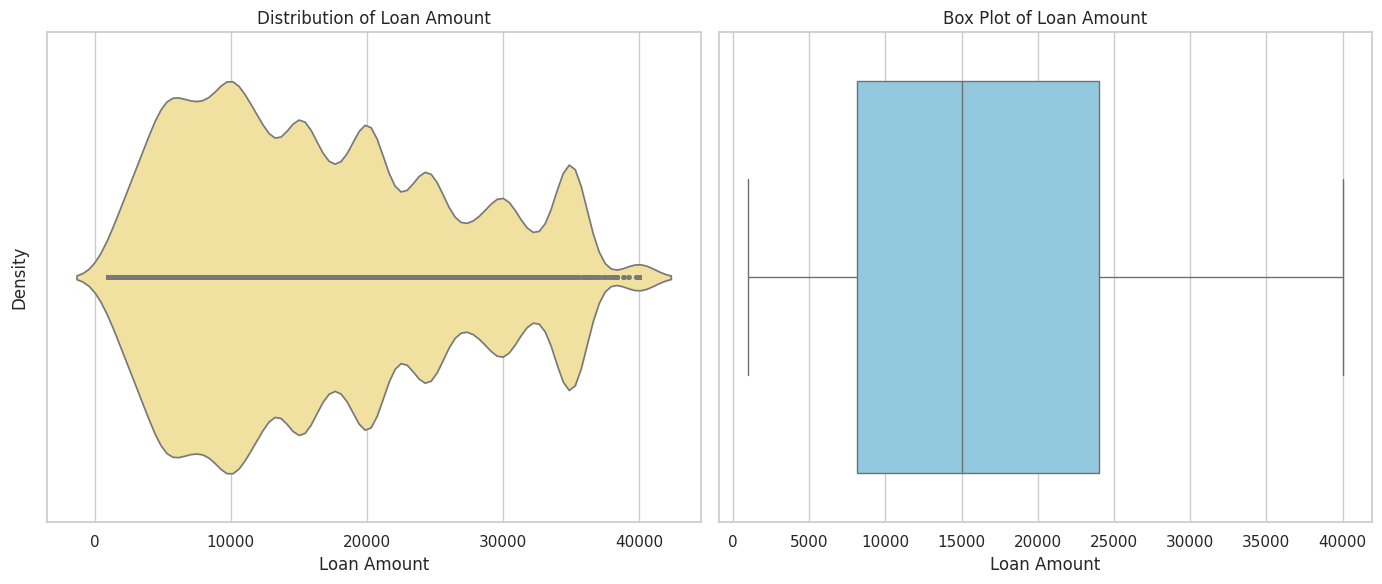

In [17]:
# Distribution and Box Plot of loan_amnt

# Style of the plot
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the violin plot on the first subplot
sns.violinplot(x=df["loan_amnt"], color="#FFE993", inner="point", ax=axes[0])
axes[0].set_title("Distribution of Loan Amount")
axes[0].set_xlabel("Loan Amount")
axes[0].set_ylabel("Density")

# Plot the box plot on the second subplot
sns.boxplot(x=df["loan_amnt"], color="skyblue", ax=axes[1])
axes[1].set_title("Box Plot of Loan Amount")
axes[1].set_xlabel("Loan Amount")
axes[1].set_ylabel("")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

The mean loans given were USD15,000 with the max being USD40,000 and min being USD1,000.

In [18]:
# Bar chart of null values in terms of %

fig = go.Figure(
    [go.Bar(x=list(sorted_column_null.keys()), y=list(sorted_column_null.values()))]
)

fig.update_layout(
    title="Null % Values for Each Column",
    xaxis_title="Variables",
    yaxis_title="Null Percentage (%)",
    title_x=0.5,
)
fig.show()

From the above chart, approx. 25% of data has more than 50% null values with the largest null value column being months since last record.

In [19]:
# The month the earliest credit line was opened

earliest_cr_month = df["earliest_cr_line"].dt.month

labels, values = labels_and_values_of_column(earliest_cr_month)

# fig = go.Figure([go.Bar(x=labels, y=values)])
fig = go.Figure(
    [
        go.Bar(
            x=labels,
            y=values,
            text=values,
            marker=dict(color="lightblue", line=dict(color="black", width=1.5)),
        )
    ]
)

fig.update_layout(
    title="Monthly Total of Earliest Credit Line Opened Between 1961 And 2014",
    xaxis_title="Month",
    yaxis_title="Total Count",
    title_x=0.5,
)
fig.show()

The bar chart above shows monthly credit line opening was quite constant across the year. The total count was approx. 10% higher (from the yearly average) between August and October.

In [20]:
# The earliest credit line was opened in terms of year

earliest_cr_year = df["earliest_cr_line"].dt.year

labels, values = labels_and_values_of_column(earliest_cr_year)

fig = go.Figure(
    [
        go.Bar(
            x=labels,
            y=values,
            marker=dict(color="indianred", line=dict(color="black", width=0.5)),
        )
    ]
)
fig.update_layout(
    title="Yearly Earliest Credit Line Opened",
    xaxis_title="Year",
    yaxis_title="Total Count",
    title_x=0.5,
)

fig.show()

The graph above shows which year the most credit lines were opened. Most credit line openings are centred +/- 5 years of year 2000. It shows a left-skewed distribution.

In [21]:
# 'home_ownership' Pie Chart

labels, values = labels_and_values_of_column(df["home_ownership"])

fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            values=values,
            textinfo="label+percent",
            insidetextorientation="radial",
        )
    ]
)
fig.update_layout(title_text="Home Ownership Type (%)", title_x=0.5)
fig.show()

From the pie chart above, mortgage, rent and owning the property is what the majority fall under. Other, Any and None are negligible.

In [22]:
# 'purpose' Pie Chart

labels, values = labels_and_values_of_column(df["purpose"])

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text="Purpose of Loan (%)", title_x=0.5)
fig.show()

From the pie chart above, the most common purpose for loans is debt consolidation, credit card and home improvements. These 3 reasons represent approx. 86%. The least ones are relating to educational, renewable energy and weddings.

In [23]:
# 'addr_state' Bar Chart

labels, values = labels_and_values_of_column(df["addr_state"])

# Define colors
highlight_color = "orange"
normal_color = "lightblue"

# Assigning color to each state based on position
marker_colors = [
    highlight_color if idx < 4 else normal_color for idx in range(len(labels))
]

# Bar chart
fig = go.Figure([go.Bar(x=labels, y=values, marker_color=marker_colors)])
fig.update_layout(
    title="Home State", xaxis_title="State", yaxis_title="Count", title_x=0.5
)
fig.show()

The state that most people live in is california and the least is Idaho. The total people living in California are approximately twice as much as Texas and New York.

In [24]:
# Top 5 Professions - emp_title column

labels, values = labels_and_values_of_column(df["addr_state"])

colors = ["blue", "green", "orange", "red", "purple"]

fig = go.Figure([go.Bar(x=labels[:5], y=values[:5], marker_color=colors)])
fig.update_layout(
    title="Top 5 Professions",
    xaxis_title="Professions",
    yaxis_title="Count",
    title_x=0.5,
)
fig.show()

The top profession is that of a managerial position. I am unsure as to what RN stands for but I assume it would be Registered Nurse. If it is a short form of Registered Nurse then this data needs to be aggregated. Other issues that could arise includes spelling mistakes and punctuation (uppercase and lowercase letters). Also, the data can further be explored by grouping similar roles together. For example,

- Managerial Positions: Manager, Supervisor, Team Lead(er)
- Teaching Positions: Teacher, Instructor, Educator
- Nursing Positions: Registered Nurse, Nurse Practitioner, Nurse Liason

In [25]:
# 'term' pie chart

labels, values = labels_and_values_of_column(df["term"], df_term_column=True)

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text="Loan Terms (%) - 60 Months vs 36 Months", title_x=0.5)
fig.show()

In [26]:
# Employment length

labels, values = labels_and_values_of_column(df["emp_length"])

colors = [
    "lightslategray",
] * len(labels)
colors[0] = "crimson"

fig = go.Figure([go.Bar(x=labels, y=values, marker_color=colors)])
fig.update_layout(
    title="Employment length", xaxis_title="Years", yaxis_title="Count", title_x=0.5
)
fig.show()

The bar chart above shows that the most in employment who needed loans were individuals who had 10+ years of experience

In [27]:
def plot_histograms(columns_per_row: int, cols: List[str], chart_width: int):

    # Calculate the total number of rows needed
    total_rows = (len(cols) + columns_per_row - 1) // columns_per_row

    # Create subplots
    fig, axes = plt.subplots(
        total_rows, columns_per_row, figsize=(chart_width, 5 * total_rows)
    )

    # Flatten the axes array to simplify indexing
    axes = axes.flatten()

    # Plot histograms for each column
    for i, column in enumerate(cols):
        ax = axes[i]
        data = df[column].dropna()
        ax.hist(data, bins=20, color="skyblue", edgecolor="black")
        ax.set_title(f"Distribution of {column}")
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")

    # Hide empty subplots if necessary
    if len(cols) < total_rows * columns_per_row:
        for j in range(len(cols), total_rows * columns_per_row):
            fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout()

    return plt.show()

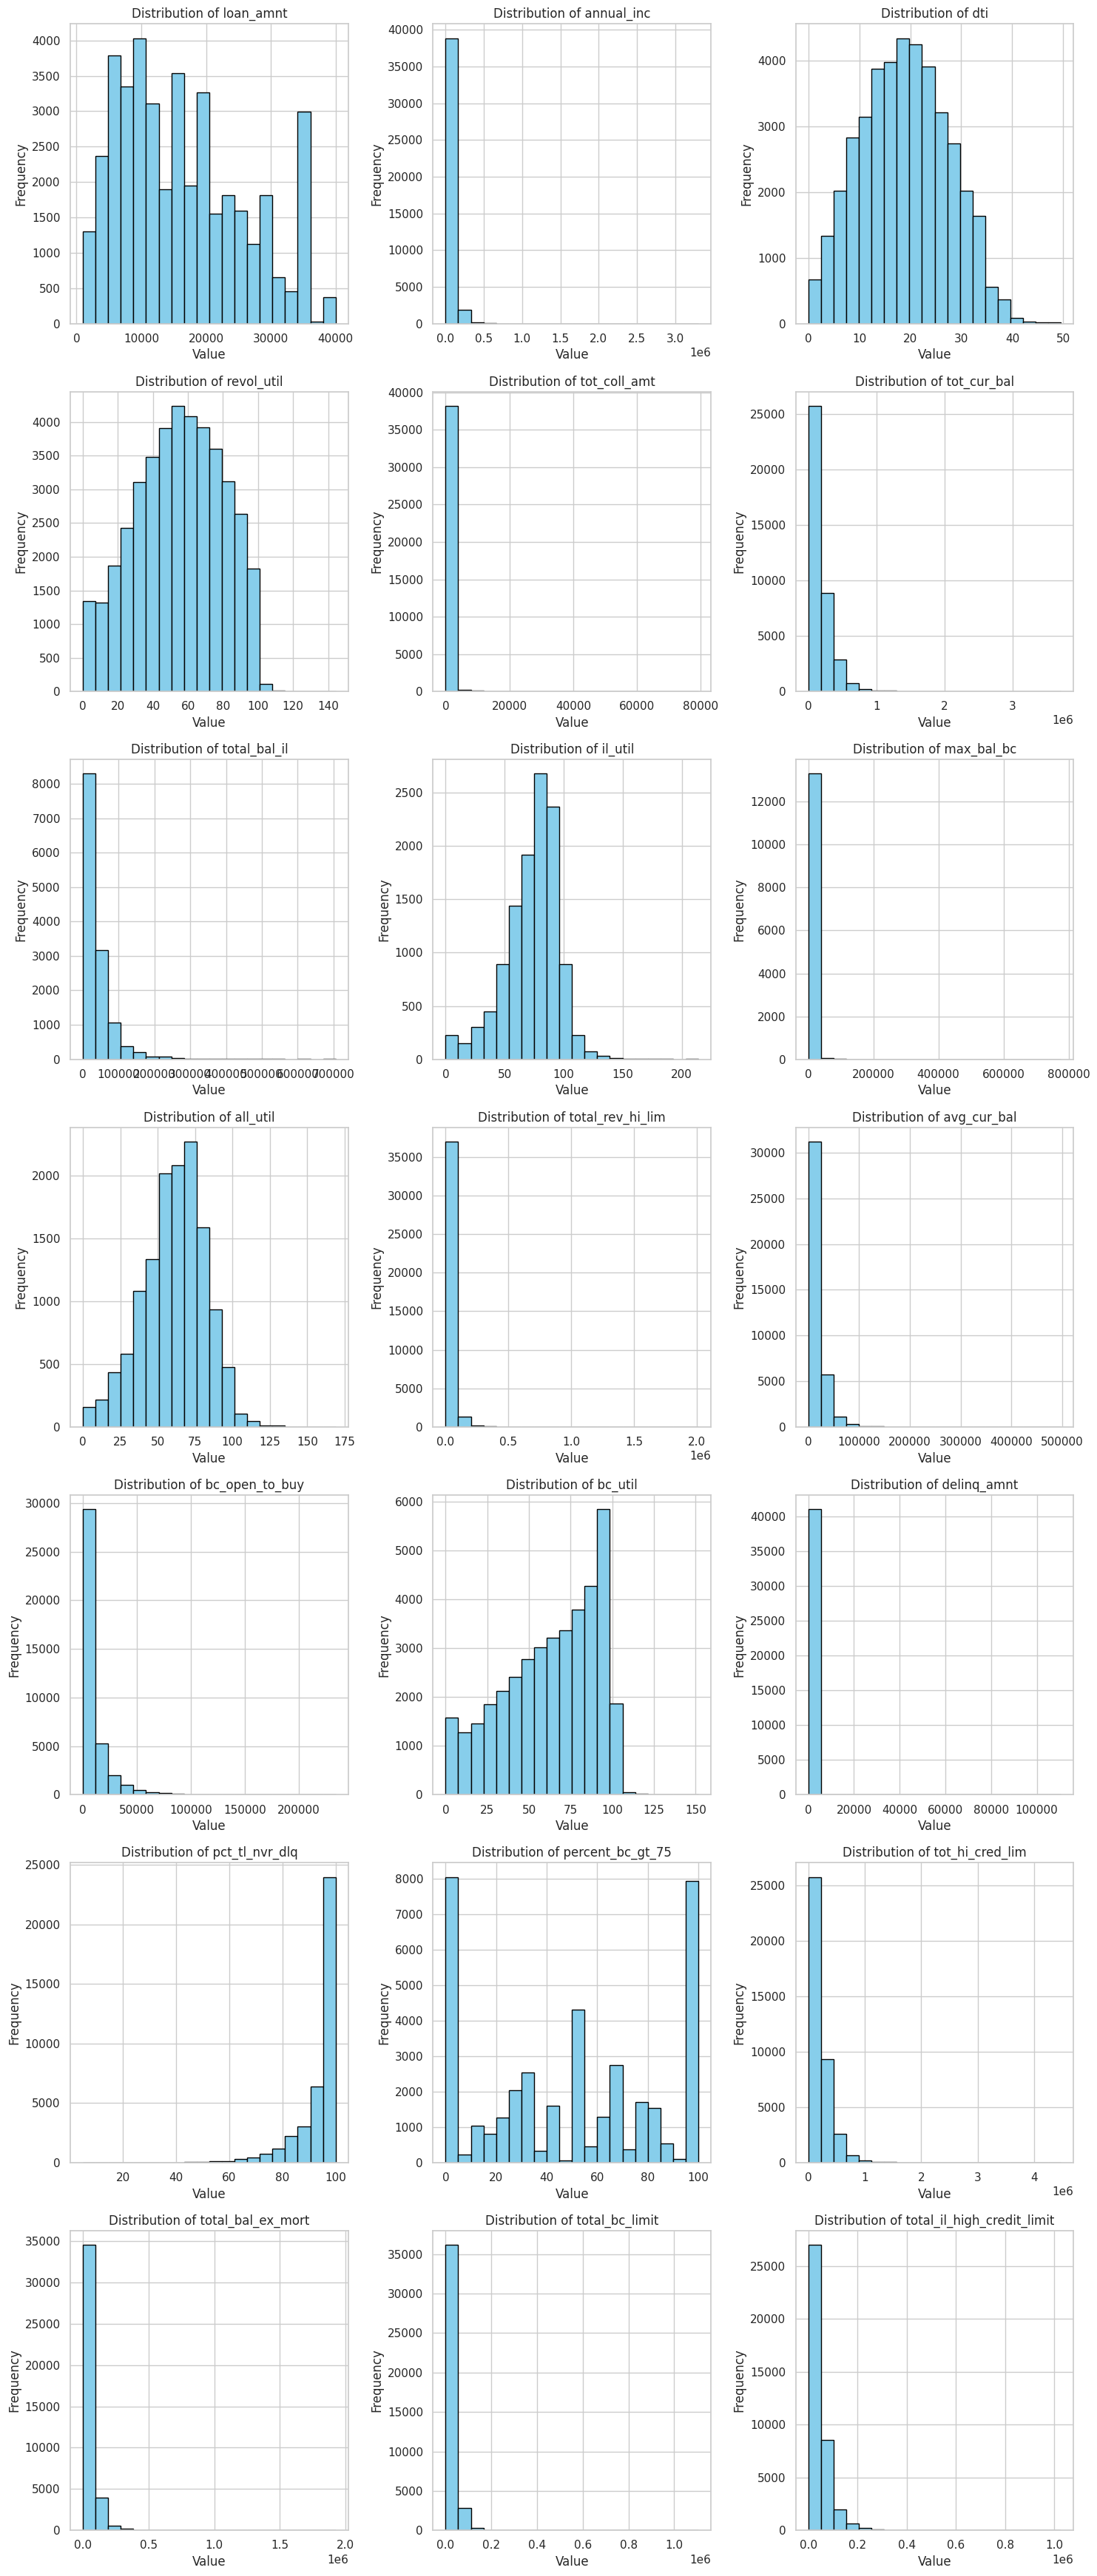

In [28]:
# Plot histograms for float dtypes

float_columns = df.select_dtypes(include="float").columns

plot_histograms(columns_per_row=3, cols=float_columns, chart_width=15)

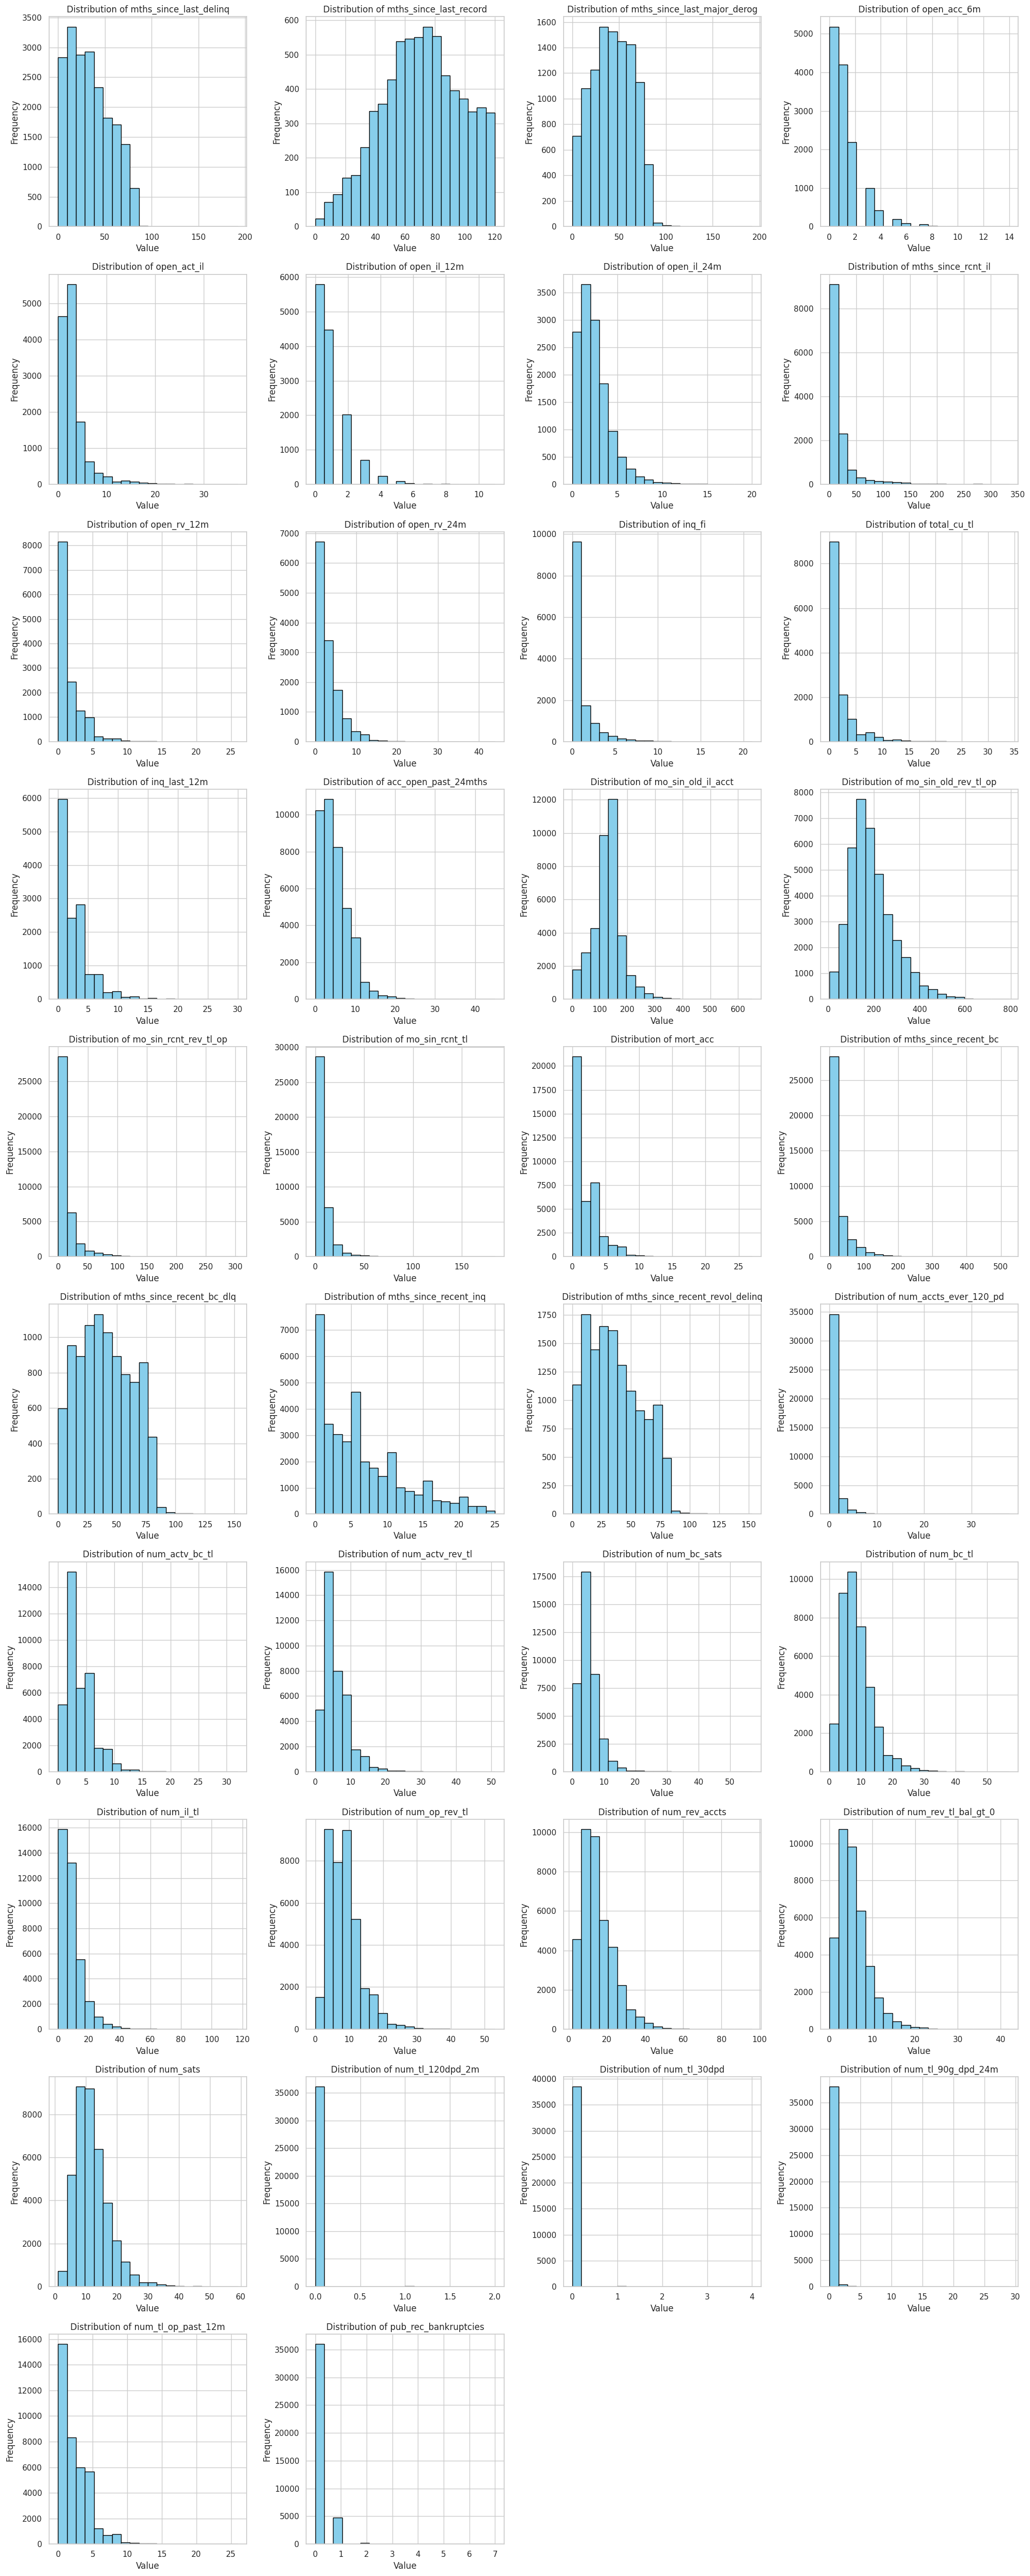

In [29]:
# Looking at the Distribution of int columns that had null values

# Select columns with integer dtype
int_columns = df.select_dtypes(include="integer")

# Get columns with null values
columns_with_null = int_columns.columns[df[int_columns.columns].isnull().any()].tolist()

plot_histograms(columns_per_row=4, cols=columns_with_null, chart_width=20)

None of the above charts have Gaussian distribution. Two columns, il_util and all_util, were further checked by looking at Q-Q plots and through normality tests such as Kolmogorov-Smirov test since they looked similar to having normal distribution.

#### Bivariate/ Multivariate

In [30]:
# stacked bar chart on term vs outcome

term_stacked = df.groupby(["outcome", "term"]).size()

x = [i[1] for i in term_stacked.index][:2]

trace1 = go.Bar(x=x, y=term_stacked.values[0:2], name="Defaulted")
trace2 = go.Bar(x=x, y=term_stacked.values[2:4], name="Fully Paid")

layout = go.Layout(
    barmode="stack",
    title={
        "text": "Relationship Between Term and Loan Repayments",
        "y": 0.9,
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
    },
    xaxis=dict(title="Term", type="category"),
    yaxis={"title": "Total Count"},
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

Analyzing the distribution of loan terms (e.g. 36 months vs. 60 months) for 'Fully Paid' and 'Defaulted' loans can provide insights into whether loan duration influences repayment behavior. From the bar chart above, regardless of term length, the number of loans defaulted were similar. However, in terms of percentage, total individuals who defaulted on 36-month term were significantly less than those on 60-month term with the ratio being 2:3.9.

In [31]:
# Relationship Between House Ownership and Loan Repayments

home_ownership_grouped = df.groupby(["outcome", "home_ownership"]).size()

x = [i[1] for i in home_ownership_grouped.index][:4]

t1 = go.Scatter(
    x=x,
    y=home_ownership_grouped.values[0:4],
    name="Defaulted",
    line=dict(color="#33CFA5"),
)

t2 = go.Scatter(
    x=x,
    y=home_ownership_grouped.values[4:8],
    name="Fully Paid",
    line=dict(color="#ffbf00"),
)

layout = go.Layout(
    title={
        "text": "Relationship Between Home Ownership and Loan Repayments",
        "x": 0.5,
        "y": 0.9,
        "xanchor": "center",
        "yanchor": "top",
    },
    xaxis=dict(title="Home Ownership", type="category"),
    yaxis={"title": "Total Count"},
)

fig = go.Figure(data=[t1, t2], layout=layout)

fig.show()

<ipython-input-32-5e02d3d6d6e2>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




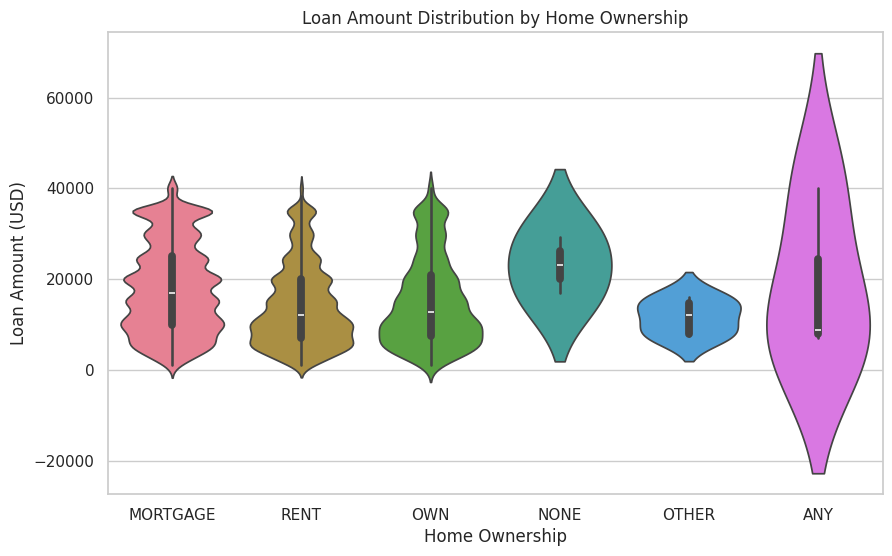

In [32]:
# Style of the plot
sns.set(style="whitegrid")

# Create a violin plot for home ownership
plt.figure(figsize=(10, 6))
sns.violinplot(x="home_ownership", y="loan_amnt", data=df, palette="husl")
plt.title("Loan Amount Distribution by Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Loan Amount (USD)")
plt.show()

Whether home ownership influences repayment behaviour can be determined by comparing loan repayment results across various statuses (rent, own, mortgage, other). From the chart above, there are more renters who defaulted than fully paid. In terms of distribution, 'rent' and 'own' seem to be similar.

In [33]:
# Relationship between Loan Amount vs. Purpose vs. Outcome

# Filter data for repaid and defaulted loans
fuly_paid_loans = df[df["outcome"] == "Fully Paid"]
defaulted_loans = df[df["outcome"] == "Defaulted"]

# Concatenate repaid and defaulted loans
all_loans = pd.concat([fuly_paid_loans, defaulted_loans])

# Create the box plot
fig = px.box(
    all_loans,
    x="purpose",
    y="loan_amnt",
    color="outcome",
    title="Box Plot of Loan Amount vs. Purpose vs. Outcome",
)
fig.update_xaxes(title="Purpose")
fig.update_yaxes(title="Loan Amount (USD)")
fig.show()

In [34]:
# Correlation Matrix for pairs equal to or over 75%

numeric_columns = df.select_dtypes(include=["int", "float"])

corr_matrix = numeric_columns.corr()

# Set the threshold for high correlation
threshold = 0.75

# Iterate through the correlation matrix to find highly correlated pairs
highly_correlated_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= threshold:
            pair = (
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j],
            )
            highly_correlated_pairs.append(pair)

# Print the highly correlated pairs
print(f"Highly correlated pairs with correlation coefficient >= {threshold}:")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} - {pair[1]}: {round(pair[2], 4)}")

Highly correlated pairs with correlation coefficient >= 0.75:
mths_since_last_delinq - mths_since_recent_bc_dlq: 0.7624
mths_since_last_delinq - mths_since_recent_revol_delinq: 0.8603
open_acc - num_op_rev_tl: 0.8518
open_acc - num_sats: 0.9983
revol_bal - total_rev_hi_lim: 0.8754
revol_util - bc_util: 0.852
total_acc - num_rev_accts: 0.7743
tot_cur_bal - avg_cur_bal: 0.8271
tot_cur_bal - tot_hi_cred_lim: 0.9883
open_il_12m - open_il_24m: 0.7658
total_bal_il - total_bal_ex_mort: 0.8744
total_bal_il - total_il_high_credit_limit: 0.9612
open_rv_12m - open_rv_24m: 0.8213
open_rv_12m - num_tl_op_past_12m: 0.8618
open_rv_24m - acc_open_past_24mths: 0.8514
total_rev_hi_lim - total_bc_limit: 0.755
acc_open_past_24mths - num_tl_op_past_12m: 0.8011
avg_cur_bal - tot_hi_cred_lim: 0.7987
bc_open_to_buy - total_bc_limit: 0.7863
bc_util - percent_bc_gt_75: 0.8495
mths_since_recent_bc_dlq - mths_since_recent_revol_delinq: 0.8849
num_actv_bc_tl - num_actv_rev_tl: 0.8175
num_actv_bc_tl - num_bc_sats: 

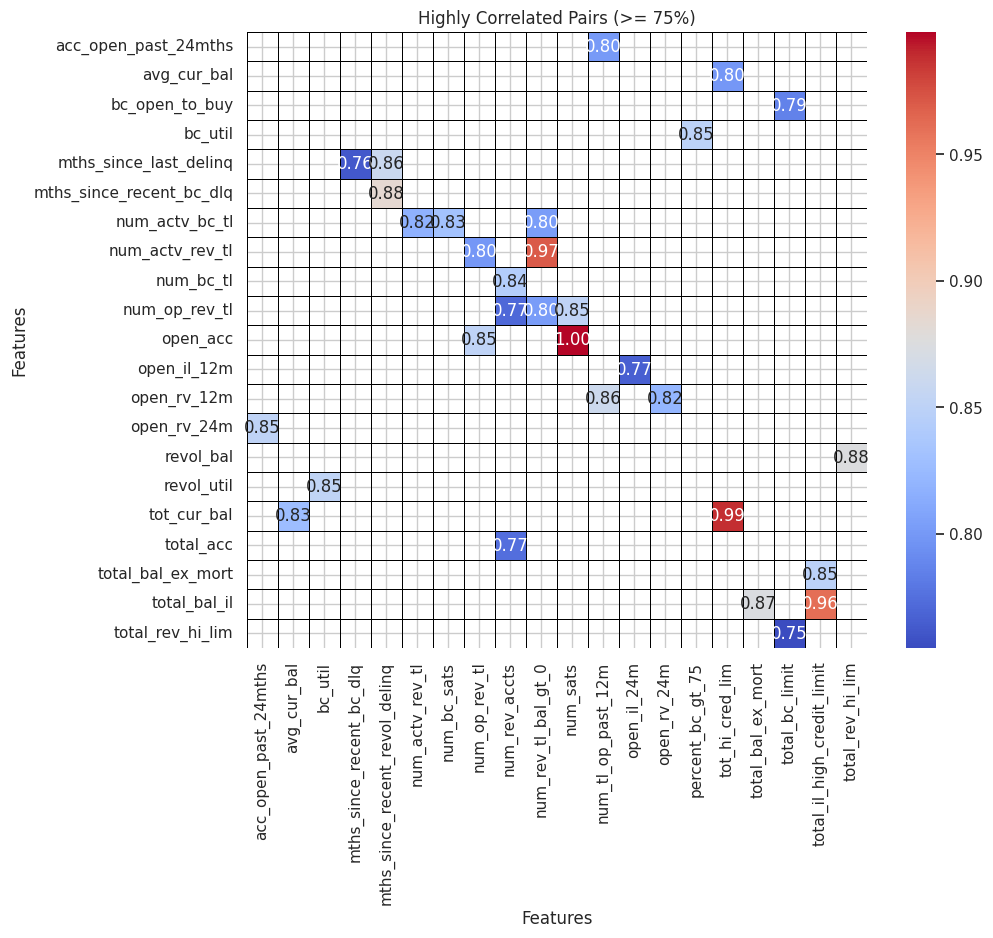

In [35]:
# Heatmap of above correlation matrix

# Create a DataFrame
highly_correlated_df = pd.DataFrame(
    highly_correlated_pairs, columns=["Feature 1", "Feature 2", "Correlation"]
)

# Create a correlation matrix
corr_matrix_heatmap = highly_correlated_df.pivot(
    index="Feature 1", columns="Feature 2", values="Correlation"
)

# Create Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix_heatmap,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    linecolor="black",
)
plt.title(f"Highly Correlated Pairs (>= {int(threshold*100)}%)")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

The correlation matrix above shows the relationship between variables that are highly correlated (with threshold value of 75%). There are 4 pairs that stand out with correlation of more than 95%.

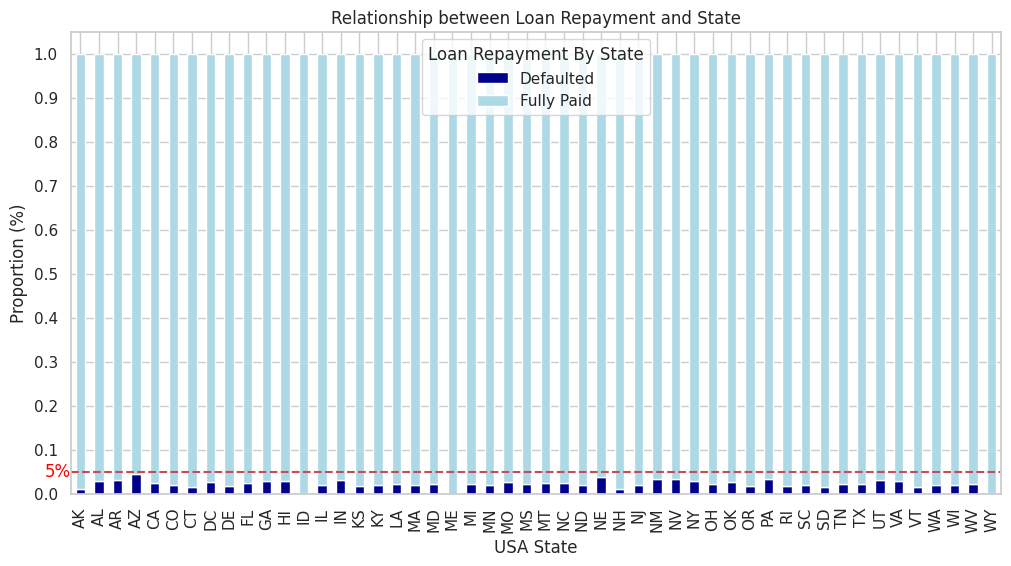

In [36]:
# Relationship between loan repayments and each state

# Calculate loan outcome proportions for each state
state_outcome_proportions = df.groupby(["addr_state", "outcome"]).size().unstack()
state_outcome_proportions["Total"] = state_outcome_proportions.sum(axis=1)
state_outcome_proportions["Defaulted"] = (
    state_outcome_proportions["Defaulted"] / state_outcome_proportions["Total"]
)
state_outcome_proportions["Fully Paid"] = (
    state_outcome_proportions["Fully Paid"] / state_outcome_proportions["Total"]
)

# Plot the bar chart
ax = state_outcome_proportions[["Defaulted", "Fully Paid"]].plot(
    kind="bar", stacked=True, figsize=(12, 6), color=["darkblue", "lightblue"]
)

# Set the title and labels
plt.title("Relationship between Loan Repayment and State")
plt.xlabel("USA State")
plt.ylabel("Proportion (%)")
plt.legend(title="Loan Repayment By State")

# Customize the y-axis ticks
ax.set_yticks([i / 10 for i in range(11)])

# Add a horizontal line
plt.axhline(y=0.05, color="r", linestyle="--")
plt.text(-0.5, 0.05, "5%", color="red", ha="right", va="center")

# Show the plot
plt.show()

In [37]:
# Scatter plot of revol_util vs loan amount

fig = px.scatter(
    df,
    x="loan_amnt",
    y="revol_util",
    color="outcome",
    title="Loan Amount (USD) vs. Revolving Line Utilization Rate (%)",
    labels={
        "loan_amnt": "Loan Amount (USD)",
        "revol_util": "Revolving Line Utilization Rate (%)",
    },
)
fig.update_layout(showlegend=True, title_x=0.5)
fig.show()

We can analyze how loan outcomes (fully paid or defaulted) are distributed across revolving line utilization rates and loan amounts. This can provide insights into whether borrowers with higher loan amounts or higher revolving line utilization rates are more likely to default on their loans. Lenders can use this information to assess the riskiness associated with lending to borrowers. From the above scatter plot, revolving line utilization rate is much more denser between 60% and 80% within loan amount of USD 10k - 20k.

In [38]:
# Scatter plot of revol_util vs total high credit limit

fig = px.scatter(
    df,
    x="revol_util",
    y="tot_hi_cred_lim",
    color="outcome",
    title="Revolving Line Utilization Rate (%) vs. Total High Credit Limit (USD)",
    labels={
        "revol_util": "Revolving Line Utilization Rate (%)",
        "tot_hi_cred_lim": "Total High Credit Limit (USD)",
    },
)
fig.update_layout(showlegend=True, title_x=0.5)
fig.show()

This visualization helps assess the association between borrowers' credit behavior, credit capacity, and loan repayment outcomes, providing valuable insights for risk assessment and lending strategies. The utilization rate has a mean value of 54.7%, lower quartile of 36.5% and higher quartile of 74%. <br>
<br>
The chart shows the densely populated region ranges between lower and upper quartile of revolving utilization rate indicating that borrowers with high credit utilization rates and lower credit capacity are more likely to default on their loans. In general, defaulters are spread across the full spectrum of utilization rate with very few close to USD 1M credit limit.

In [39]:
# Scatter plot of Total current balance of all accounts vs total high credit limit

fig = px.scatter(
    df,
    x="tot_cur_bal",
    y="tot_coll_amt",
    color="outcome",
    title="Total Current Balance vs. Total Amount Owed",
    labels={
        "tot_cur_bal": "Total current balance of all accounts (USD)",
        "tot_coll_amt": "Total collection amounts ever owed (USD)",
    },
)
fig.update_layout(showlegend=True, title_x=0.5)
fig.show()

This scatter plot can provide insights into the relationship between a borrower's financial situation (represented by total current balance and total collection amounts) and their likelihood of loan default. The chart shows that the majority of defaulters had a total current bank balance of less than USD 0.5M and less than USD 5k in total amount ever owed. There is one defaulter (outlier) who's amount owed is over 50k.  

In [40]:
# Analysing "Credit History". The visuals are in the graph below.

"""
Getting a beter understanding of some variables such as
'delinq_2yrs', 'pub_rec', 'inq_last_6mths' will help in
getting insights about the credit history of individuals.
'"""

# Initialize an empty dictionary to store DataFrames
dfs = {}

# Iterate over the credit history fields
for field in ["delinq_2yrs", "pub_rec", "inq_last_6mths"]:
    # Group data by the credit history field and outcome
    grouped_data = df.groupby([field, "outcome"]).size().unstack()

    # Calculate the total for each row
    row_total = grouped_data.sum(axis=1)

    # Divide each value by the row total to get the percentage
    percentage_df = round(grouped_data.div(row_total, axis=0) * 100, 2)

    # Store the percentage DataFrame in the dictionary
    dfs[field] = percentage_df

# Concatenate the DataFrames into a single DataFrame
result_df = pd.concat(dfs, axis=1)

# Show the result DataFrame
print("Result DataFrame:")
result_df.head()

Result DataFrame:


delinq_2yrs              pub_rec            inq_last_6mths           
outcome   Defaulted Fully Paid Defaulted Fully Paid      Defaulted Fully Paid
0              2.38      97.62      2.39      97.61           2.22      97.78
1              2.87      97.13      2.83      97.17           2.50      97.50
2              2.59      97.41      1.88      98.12           3.12      96.88
3              1.00      99.00      2.27      97.73           3.08      96.92
4              1.75      98.25      2.78      97.22           2.95      97.05

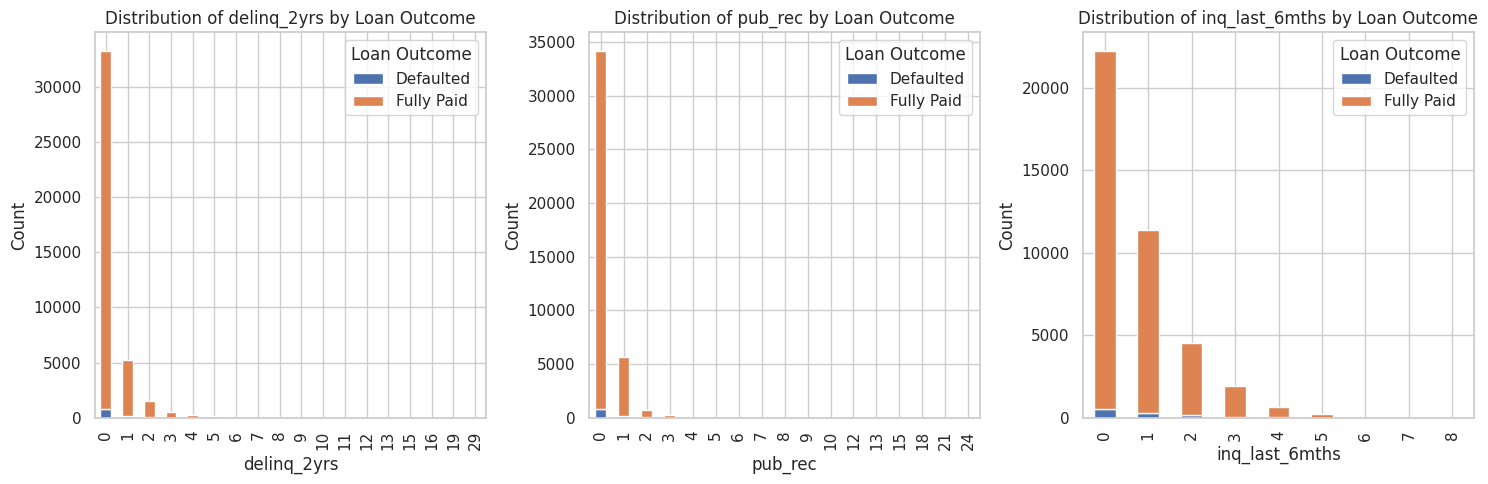

In [41]:
# Chart of the above "Credit History" data

# Group data by credit history fields and loan outcome
grouped_data = df.groupby(["delinq_2yrs", "outcome"]).size().unstack()

# Plot stacked bar charts
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, field in enumerate(["delinq_2yrs", "pub_rec", "inq_last_6mths"]):
    # Group data by the credit history field and outcome
    grouped_data = df.groupby([field, "outcome"]).size().unstack()

    # Plot the stacked bar chart
    grouped_data.plot(kind="bar", stacked=True, ax=axes[i])

    # Set title and labels
    axes[i].set_title(f"Distribution of {field} by Loan Outcome")
    axes[i].set_xlabel(field)
    axes[i].set_ylabel("Count")
    axes[i].legend(title="Loan Outcome")

plt.tight_layout()
plt.show()

- delinq_2yrs
    - Higher values of delinq_2yrs indicate that the borrower has a history of being delinquent on their payments.
    - If delinq_2yrs is low (or 0), it suggests that the borrower has not missed payments in the past, which may indicate a lower risk of default.
    - Conversely, if delinq_2yrs is high, it suggests a higher likelihood of default, as the borrower has a history of payment delinquency.
<br><br>
- pub_rec (Number of derogatory public records):
    - A higher number of pub_rec indicates that the borrower has derogatory public records such as bankruptcies, tax liens, or judgments against them.
    - Borrowers with a higher number of pub_rec may be viewed as higher risk by lenders, as they have a history of financial difficulties.
    - Thus, a higher pub_rec count may be associated with a higher likelihood of default.
<br><br>
- inq_last_6mths (Number of inquiries in the past 6 months, excluding auto and mortgage inquiries):
    - This variable reflects recent credit inquiries made by the borrower.
    - A higher number of inquiries in the last 6 months may suggest that the borrower has been actively seeking credit, which could indicate financial instability or a need for additional funds.
    - However, if the inquiries are for mortgage or auto loans, they may indicate responsible financial planning rather than financial distress.
    - Overall, a high number of recent inquiries, especially if they are for non-mortgage or non-auto loans, may be indicative of financial stress and could correlate with a higher likelihood of default.

## Data Preparation - Benchmark

In [42]:
# Drop duplicate rows but leave one
df.drop_duplicates(inplace=True)

In [43]:
# There are too many nunique() data points for emp_title -> 20348 counts. We will drop this for now.
cleaned_df = df.copy()
cleaned_df.drop(columns=["emp_title"], inplace=True)

In [44]:
# Replace spaces with underscore in columns

# emp_length
cleaned_df.emp_length = cleaned_df.emp_length.str.replace("<", "less_than")
cleaned_df.emp_length = cleaned_df.emp_length.str.replace(" ", "_")

# Outcome
cleaned_df.outcome = cleaned_df.outcome.str.replace(" ", "_")

In [45]:
# Applying Dummy Encoding
categorical_vars = cleaned_df.select_dtypes(include=["object"]).columns.tolist()

# Removing target variable
categorical_vars.remove("outcome")

cleaned_df = pd.get_dummies(cleaned_df, columns=categorical_vars)

In [46]:
# Converting datetime features
cleaned_df["earliest_cr_year"] = cleaned_df["earliest_cr_line"].dt.year
cleaned_df["earliest_cr_line"] = cleaned_df["earliest_cr_line"].dt.month

In [47]:
# Encoding 'outcome'

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode target variable
cleaned_df["outcome"] = label_encoder.fit_transform(df["outcome"])

# Note: 1 represents Fully Paid and 0 represents Defaulted

## Model Building - Benchmark

#### Functions for Obtaining ML Results

In [48]:
def train_test_data(
    stratify,
    dataframe: pd.DataFrame,
    test_size: float = 0.3,
) -> Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:

    X = dataframe.drop("outcome", axis=1)
    y = dataframe["outcome"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=stratify, random_state=42
    )
    return X_train, X_test, y_train, y_test

In [49]:
def evaluate_performance(
    X_train: pd.DataFrame,
    X_test: pd.Series,
    y_train: pd.DataFrame,
    y_test: pd.Series,
    models: Dict[str, Any],
    decimal_places: int = 4,
) -> Tuple[Dict[str, Any], Dict[str, List[float]]]:

    results = {}
    roc_auc_results = {}

    for name, model in tqdm(models.items(), desc="Training Models"):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        cm = confusion_matrix(y_test, y_pred)
        fpr, tpr, thresholds = roc_curve(
            y_test, model.predict_proba(X_test)[:, 1]
        )

        results[name] = {
            "Accuracy": round(accuracy, decimal_places),
            "Precision": round(precision, decimal_places),
            "Recall": round(recall, decimal_places),
            "F1 Score": round(f1, decimal_places),
            "ROC-AUC Score": round(roc_auc, decimal_places),
            "Confusion Matrix": cm,
        }

        roc_auc_results[name] = {
            "FPR": fpr.tolist(),
            "TPR": tpr.tolist(),
            "Thresholds": thresholds.tolist(),
        }
    return results, roc_auc_results

In [50]:
def get_ml_results(
    dataframe: pd.DataFrame, models: Dict[str, Any], stratify=None
) -> Tuple[pd.DataFrame, Dict[str, Dict[str, List[float]]]]:

    X_train, X_test, y_train, y_test = train_test_data(stratify, dataframe)

    results, roc_auc_results = evaluate_performance(
        X_train, X_test, y_train, y_test, models
    )

    df_results = pd.DataFrame(results).T.reset_index().rename(
        columns={"index": "Model"}
    )
    print("Performance Metrics:")
    return df_results, roc_auc_results

#### Functions for confusion matrix and roc_auc chart

In [51]:
def plot_confusion_matrix(dataframe_results):

    # Extract confusion matrices and model names from the DataFrame
    confusion_matrices = dataframe_results["Confusion Matrix"]
    model_names = dataframe_results.index.tolist()

    # Determine the number of confusion matrices
    num_matrices = len(confusion_matrices)

    # Calculate the number of rows and columns for subplot layout
    num_cols = num_matrices

    # Create a figure and axis for plotting
    fig, axes = plt.subplots(1, num_cols, figsize=(10, 5))

    # Flatten axes if necessary
    if num_matrices == 1:
        axes = [axes]

    # Plot confusion matrices
    for i, (cm, model_name, ax) in enumerate(
        zip(confusion_matrices, model_names, axes), 1
    ):

        # Create ConfusionMatrixDisplay object
        cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)

        # Remove grid lines
        ax.grid(False)

        # Plot the confusion matrix without color scale
        cm_display.plot(ax=ax, colorbar=False)

        # Customize the plot
        ax.set_title(list(ml_models)[model_name])
        ax.set_xlabel("Predicted Label")
        ax.set_ylabel("True Label")
        ax.tick_params(axis="x", rotation=45)
        ax.tick_params(axis="y", rotation=45)

    # Adjust layout
    plt.tight_layout()

    print("Confusion Matrix Tables:")
    print("Note: 1 stands for Positive and 0 for Negative in the diagram(s)")

    # Show plot
    return plt.show()

In [52]:
def roc_auc_chart(roc_auc_curve_results):
    # Initialize the plot
    plt.figure(figsize=(8, 6))

    # Plot ROC curves for each model
    for name, roc_data in roc_auc_results.items():
        fpr = roc_data["FPR"]
        tpr = roc_data["TPR"]
        plt.plot(fpr, tpr, lw=2, label=f"{name}")

    # Plot ROC curve for random guessing (diagonal line)
    plt.plot([0, 1], [0, 1], linestyle="--", color="red", lw=2, label="Random Guessing")

    # # Set labels and title
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")

    # Show plot
    plt.show()

#### ML Results

In [53]:
ml_models = {
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

ml_results_with_missing_values, roc_auc_results = get_ml_results(
    dataframe=cleaned_df, models=ml_models
)
ml_results_with_missing_values

Training Models:  50%|█████     | 1/2 [00:08<00:08,  8.24s/it]

[LightGBM] [Info] Number of positive: 28020, number of negative: 680
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7928
[LightGBM] [Info] Number of data points in the train set: 28700, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.976307 -> initscore=3.718581
[LightGBM] [Info] Start training from score 3.718581


Training Models: 100%|██████████| 2/2 [00:10<00:00,  5.36s/it]

Performance Metrics:


Model Accuracy Precision  Recall F1 Score ROC-AUC Score  \
0   XGBoost   0.9736     0.974  0.9996   0.9866        0.5852   
1  LightGBM   0.9739     0.974  0.9999   0.9868        0.6253   

         Confusion Matrix  
0  [[0, 320], [5, 11975]]  
1  [[0, 320], [1, 11979]]

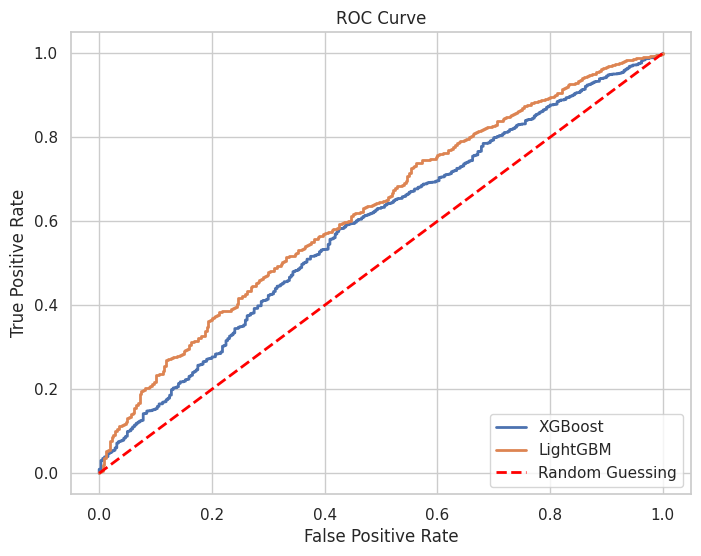

In [54]:
roc_auc_chart(roc_auc_results)

Confusion Matrix Tables:
Note: 1 stands for Positive and 0 for Negative in the diagram(s)


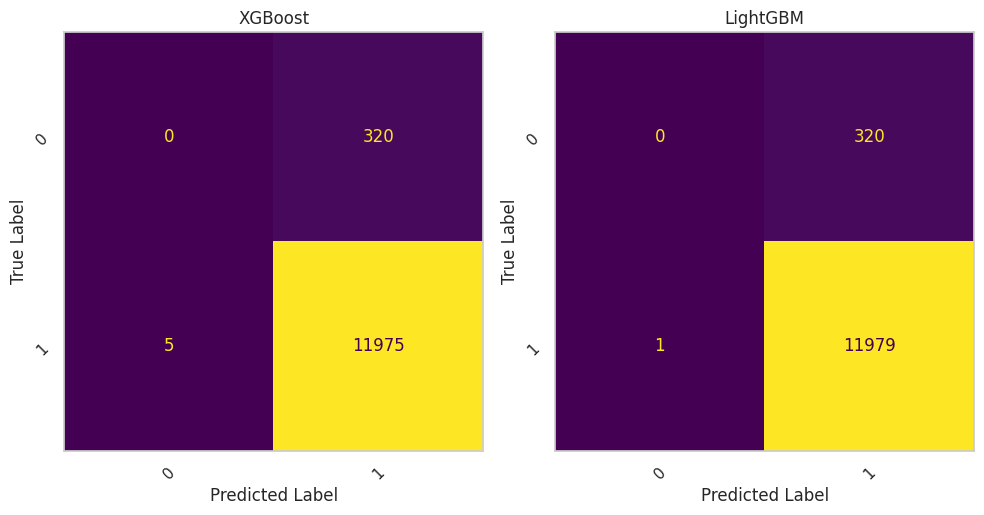

In [55]:
# Confusion Matrix
plot_confusion_matrix(dataframe_results=ml_results_with_missing_values)

<b>Precision</b>: tells us how precise or accurate the model is when it predicts positive instances. XGBoost's precision of 97.4% suggest that improvement could be made to increase profit margin.
<br><br>
<b>Recall</b>: tells us how well the model captures all positive instances in the dataset.
<br><br>
<b>ROC-AUC</b> (Receiver Operating Characteristic - Area Under the Curve):
<br>
1. ROC-AUC score measures the area under the curve, which is a graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) across various thresholds.
2. A ROC-AUC score of 0.5852 for XGBoost indicates that the model's ability to distinguish between the positive and negative classes is slightly better than random chance and that there is room for improvement.


---


Since the data is imbalanced, focus will be on precision, recall (sensitivity) and F1-score.
<br><br>
Precision, recall and F1 formulas are based on below:

<b>True Positive (TP)</b>: The model predicts that the loan will be repaid and the original outcome in the dataset is the same.

<b>True Negative (TN)</b>: The model predicts that the loan will default and the original outcome in the dataset is the same.

<b>False Positive (FP)</b>: The model predicts that the loan will be repaid, but the original outcome in the dataset is that it will default.

<b>False Negative (FN)</b>: The model predicts that the loan will default, but the original outcome in the dataset is that it will not default.

## Further Preparation of Dataset - No Imputation

In this section, we will get a completely clean dataset with no null values. After this, we can do feature engineering by adding columns we removed and imputing them or by adding other features.

In [56]:
clean_dataset_df = cleaned_df.copy()

In [57]:
# Columns to drop

"""
I am dropping these columns because they either have skewed distribution,
are highly correlated with other variables or do not have significant amount
of data to draw a conclusion from.
"""

columns_to_drop = [
    "mths_since_recent_inq",
    "mo_sin_old_il_acct",
    "il_util",
    "all_util",
    "num_tl_120dpd_2m",
    "mths_since_last_record",
    "mths_since_recent_bc_dlq",
    "mths_since_last_major_derog",
    "mths_since_last_delinq",
    "mths_since_recent_revol_delinq",
    "inq_last_12m",
    "max_bal_bc",
    "open_acc_6m",
    "open_act_il",
    "open_il_12m",
    "open_il_24m",
    "mths_since_rcnt_il",
    "inq_fi",
    "total_cu_tl",
    "total_bal_il",
    "open_rv_12m",
    "open_rv_24m",
    "emp_length_10+_years",
    "emp_length_1_year",
    "emp_length_2_years",
    "emp_length_3_years",
    "emp_length_4_years",
    "emp_length_5_years",
    "emp_length_6_years",
    "emp_length_7_years",
    "emp_length_8_years",
    "emp_length_9_years",
    "emp_length_less_than_1_year",
]

# Drop columns
clean_dataset_df = clean_dataset_df.drop(columns=columns_to_drop)
clean_dataset_df.head()

borrower_id  loan_amnt  term  annual_inc  outcome    dti  delinq_2yrs  \
0       537185    16075.0    60     50289.0        1  12.27            0   
1      1810804     8000.0    36     64000.0        1  19.93            0   
2       388855    23700.0    36     88000.0        1  29.80            0   
3      1137067     1200.0    36     81000.0        1  12.87            1   
4        14585     3500.0    36     11736.0        1  31.39            0   

   earliest_cr_line  inq_last_6mths  open_acc  ...  addr_state_TN  \
0                 6               0         7  ...              0   
1                 9               0         8  ...              0   
2                10               2        23  ...              0   
3                 1               0        11  ...              0   
4                 5               0         7  ...              0   

   addr_state_TX  addr_state_UT  addr_state_VA  addr_state_VT  addr_state_WA  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              1   

   addr_state_WI  addr_state_WV  addr_state_WY  earliest_cr_year  
0              0              0              0              2001  
1              0              0              0              1998  
2              0              0              0              2006  
3              0              0              0              2001  
4              0              0              0              2004  

[5 rows x 122 columns]

In [58]:
# Rows to drop

# Define the list of columns to check for null values
columns_to_check = [
    "pct_tl_nvr_dlq",
    "tot_coll_amt",
    "tot_cur_bal",
    "total_rev_hi_lim",
    "avg_cur_bal",
    "mo_sin_old_rev_tl_op",
    "mo_sin_rcnt_rev_tl_op",
    "mo_sin_rcnt_tl",
    "num_accts_ever_120_pd",
    "num_actv_bc_tl",
    "num_actv_rev_tl",
    "num_bc_tl",
    "num_il_tl",
    "num_op_rev_tl",
    "num_rev_accts",
    "num_rev_tl_bal_gt_0",
    "num_tl_30dpd",
    "num_tl_90g_dpd_24m",
    "num_tl_op_past_12m",
    "tot_hi_cred_lim",
    "total_il_high_credit_limit",
    "bc_util",
    "percent_bc_gt_75",
    "bc_open_to_buy",
    "mths_since_recent_bc",
    "num_bc_sats",
    "num_sats",
    "acc_open_past_24mths",
    "mort_acc",
    "total_bal_ex_mort",
    "total_bc_limit",
    "revol_util",
    "loan_amnt",
    "pub_rec_bankruptcies",
]

# Find rows with null values in any of the specified columns
rows_with_null = clean_dataset_df[
    clean_dataset_df[columns_to_check].isnull().any(axis=1)
]

# Store the index of rows with null values
"This could be for use later when re-adding dropped variables"
rows_to_remove_index = rows_with_null.index.tolist()

# Count the number of rows with null values
rows_to_remove_count = len(rows_with_null)

# Remove rows with null values in any of the specified columns
clean_dataset_rows_removed = clean_dataset_df.dropna(subset=columns_to_check)
clean_dataset_rows_removed.head()

borrower_id  loan_amnt  term  annual_inc  outcome    dti  delinq_2yrs  \
0       537185    16075.0    60     50289.0        1  12.27            0   
1      1810804     8000.0    36     64000.0        1  19.93            0   
2       388855    23700.0    36     88000.0        1  29.80            0   
3      1137067     1200.0    36     81000.0        1  12.87            1   
4        14585     3500.0    36     11736.0        1  31.39            0   

   earliest_cr_line  inq_last_6mths  open_acc  ...  addr_state_TN  \
0                 6               0         7  ...              0   
1                 9               0         8  ...              0   
2                10               2        23  ...              0   
3                 1               0        11  ...              0   
4                 5               0         7  ...              0   

   addr_state_TX  addr_state_UT  addr_state_VA  addr_state_VT  addr_state_WA  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              1   

   addr_state_WI  addr_state_WV  addr_state_WY  earliest_cr_year  
0              0              0              0              2001  
1              0              0              0              1998  
2              0              0              0              2006  
3              0              0              0              2001  
4              0              0              0              2004  

[5 rows x 122 columns]

In [59]:
# Check for null values in the DataFrame
null_values = clean_dataset_rows_removed.isnull().sum()
null_values

# Display columns with null values, if any
print("Columns with null values:")
null_values[null_values > 0]

Columns with null values:


Series([], dtype: int64)

## Model Building

In [60]:
new_df = clean_dataset_rows_removed.copy()

In [61]:
# Get results of all chosen models

ml_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=10, random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

ml_results, roc_auc_results = get_ml_results(dataframe=new_df, models=ml_models)
ml_results

Training Models:  80%|████████  | 4/5 [00:11<00:02,  2.10s/it]

[LightGBM] [Info] Number of positive: 26005, number of negative: 660
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5999
[LightGBM] [Info] Number of data points in the train set: 26665, number of used features: 117
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.975248 -> initscore=3.673804
[LightGBM] [Info] Start training from score 3.673804


Training Models: 100%|██████████| 5/5 [00:12<00:00,  2.49s/it]

Performance Metrics:


Model Accuracy Precision  Recall F1 Score ROC-AUC Score  \
0  Logistic Regression   0.9754    0.9754     1.0   0.9876        0.5918   
1        Decision Tree   0.9462     0.976  0.9686   0.9723        0.5128   
2        Random Forest   0.9754    0.9754     1.0   0.9876        0.5096   
3              XGBoost   0.9752    0.9754  0.9998   0.9875        0.5978   
4             LightGBM   0.9751    0.9754  0.9997   0.9874        0.6365   

            Confusion Matrix  
0     [[0, 281], [0, 11147]]  
1  [[16, 265], [350, 10797]]  
2     [[0, 281], [0, 11147]]  
3     [[0, 281], [2, 11145]]  
4     [[0, 281], [3, 11144]]

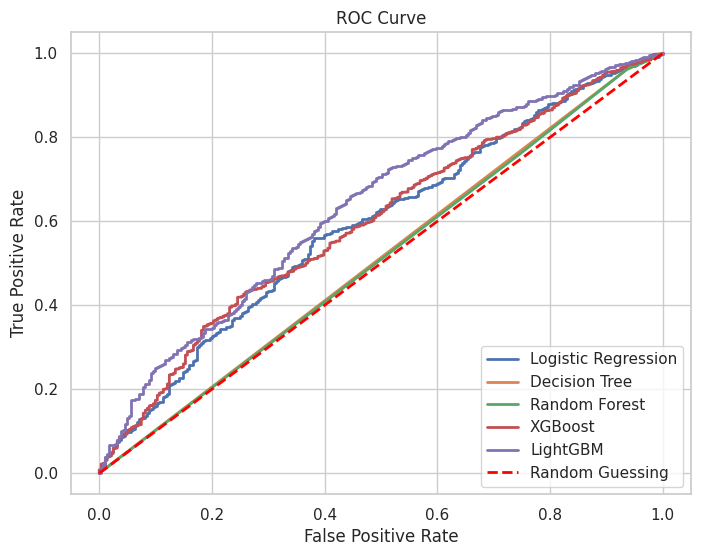

In [62]:
roc_auc_chart(roc_auc_results)

Confusion Matrix Tables:
Note: 1 stands for Positive and 0 for Negative in the diagram(s)


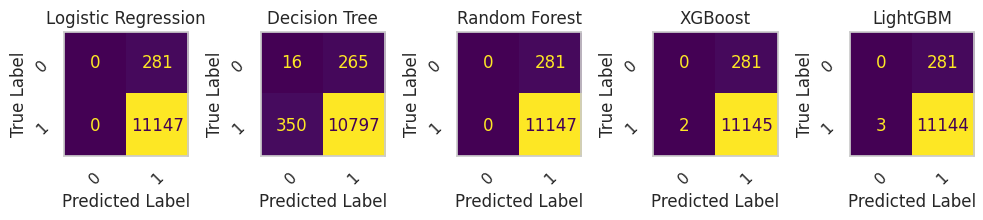

In [63]:
# Confusion Matrix
plot_confusion_matrix(dataframe_results=ml_results)

## Feature Engineering

Now that we have our complete dataframe (new_df) with no null values and no imputation, we can now apply feature engineering techniques. This can include various imputation methods, log_transformations, feature crossing, binning/grouping and handling outliers. Removed columns can be re-added too.

In [64]:
feature_engineering_df = new_df.copy()

In [65]:
# Outcome for stratified input
y = feature_engineering_df["outcome"]

In [66]:
# Stratified Sampling

ml_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=10, random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

feature_engineering_ml_results, roc_auc_results = get_ml_results(
    dataframe=feature_engineering_df, models=ml_models, stratify=y
)
feature_engineering_ml_results

Training Models:  80%|████████  | 4/5 [00:08<00:01,  1.71s/it]

[LightGBM] [Info] Number of positive: 26006, number of negative: 659
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5989
[LightGBM] [Info] Number of data points in the train set: 26665, number of used features: 117
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.975286 -> initscore=3.675359
[LightGBM] [Info] Start training from score 3.675359


Training Models: 100%|██████████| 5/5 [00:09<00:00,  1.85s/it]

Performance Metrics:


Model Accuracy Precision  Recall F1 Score ROC-AUC Score  \
0  Logistic Regression   0.9753    0.9753     1.0   0.9875        0.6031   
1        Decision Tree   0.9457    0.9754  0.9688   0.9721        0.5021   
2        Random Forest   0.9753    0.9753     1.0   0.9875        0.5393   
3              XGBoost   0.9751    0.9753  0.9998   0.9874        0.5875   
4             LightGBM   0.9752    0.9753  0.9999   0.9875        0.6272   

            Confusion Matrix  
0     [[0, 282], [0, 11146]]  
1  [[10, 272], [348, 10798]]  
2     [[0, 282], [0, 11146]]  
3     [[0, 282], [2, 11144]]  
4     [[0, 282], [1, 11145]]

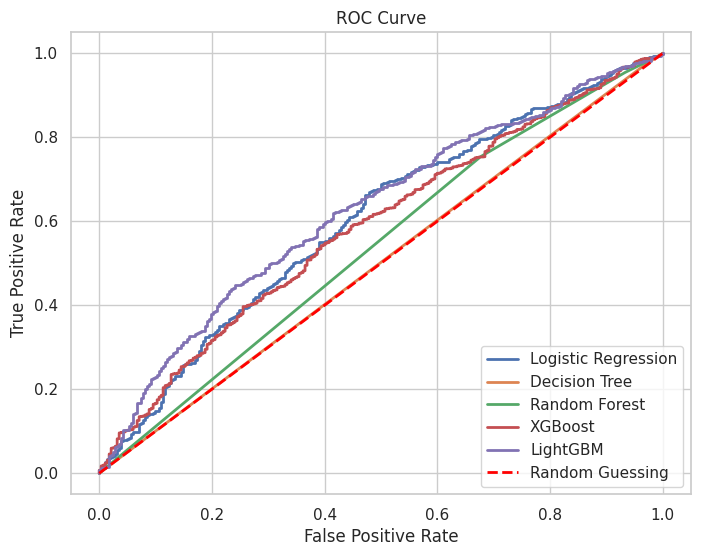

In [67]:
roc_auc_chart(roc_auc_results)

Confusion Matrix Tables:
Note: 1 stands for Positive and 0 for Negative in the diagram(s)


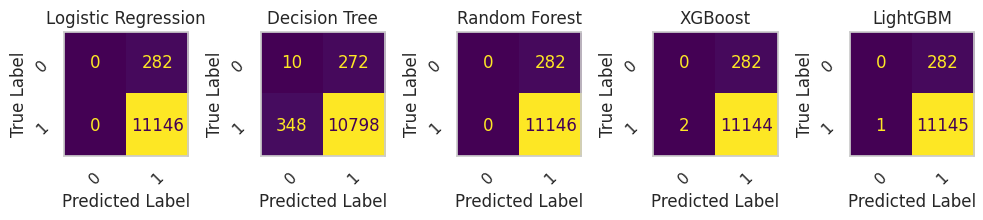

In [68]:
# Confusion Matrix
plot_confusion_matrix(dataframe_results=feature_engineering_ml_results)

#### Feature 1 - EMI

In [69]:
# Adding a new feature - EMI (Equated Monthly Installments)
feature_engineering_df["EMI"] = (
    feature_engineering_df["loan_amnt"] / feature_engineering_df["term"]
)

In [70]:
# Stratified Sampling with annual_inc_dti_interaction Column
ml_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

ml_results_with_EMI, roc_auc_results = get_ml_results(
    dataframe=feature_engineering_df, models=ml_models, stratify=y
)
ml_results_with_EMI

Training Models:   0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Training Models:  80%|████████  | 4/5 [00:17<00:04,  4.01s/it]

[LightGBM] [Info] Number of positive: 26006, number of negative: 659
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6244
[LightGBM] [Info] Number of data points in the train set: 26665, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.975286 -> initscore=3.675359
[LightGBM] [Info] Start training from score 3.675359


Training Models: 100%|██████████| 5/5 [00:18<00:00,  3.64s/it]

Performance Metrics:


Model Accuracy Precision  Recall F1 Score ROC-AUC Score  \
0  Logistic Regression   0.9753    0.9753     1.0   0.9875        0.6112   
1        Decision Tree   0.9436    0.9755  0.9664    0.971        0.5045   
2        Random Forest   0.9753    0.9753     1.0   0.9875        0.5732   
3              XGBoost   0.9753    0.9753     1.0   0.9875        0.6157   
4             LightGBM   0.9751    0.9753  0.9998   0.9874        0.6334   

            Confusion Matrix  
0     [[0, 282], [0, 11146]]  
1  [[12, 270], [374, 10772]]  
2     [[0, 282], [0, 11146]]  
3     [[0, 282], [0, 11146]]  
4     [[0, 282], [2, 11144]]

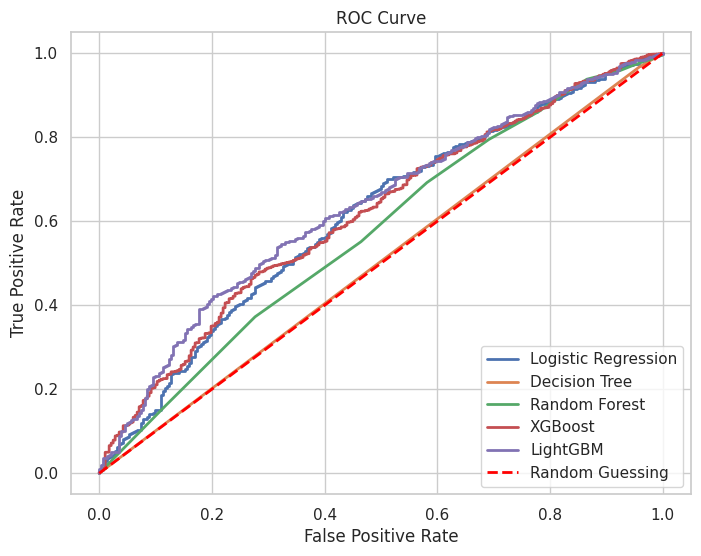

In [71]:
roc_auc_chart(roc_auc_results)

From the above roc_auc curve, XGBoost and Logistic Regression are very similar.

Confusion Matrix Tables:
Note: 1 stands for Positive and 0 for Negative in the diagram(s)


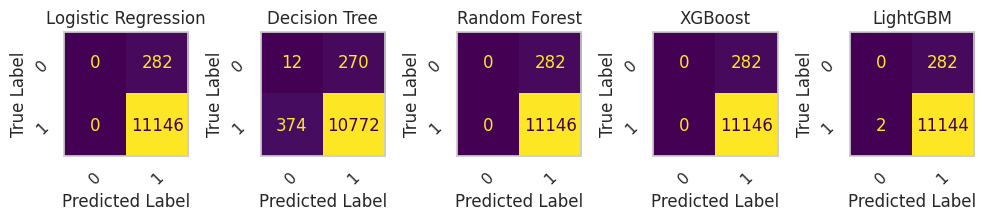

In [72]:
# Confusion Matrix
plot_confusion_matrix(dataframe_results=ml_results_with_EMI)

We will now drop this new variable because the correlation between those current features and this new one will be very high. Logistic regression assumes that the variables are not highly correlated.

In [73]:
feature_engineering_df.drop("EMI", axis=1, inplace=True)

#### Feature 2 - Emp_length

In [74]:
# Re-adding 'emp_length' variable
"Looking into the significance of emp_length to loan repayment"

'Looking into the significance of emp_length to loan repayment'

In [75]:
# Remove rows from df using rows_to_remove_index
emp_length_rows_removed = df["emp_length"].drop(index=rows_to_remove_index)

In [76]:
# Adding to df
feature_engineering_df.loc[:, "emp_length"] = emp_length_rows_removed

In [77]:
# Checking null values
feature_engineering_df["emp_length"].isnull().sum()

4186

In [78]:
# Imputing null values
feature_engineering_df["emp_length"] = feature_engineering_df["emp_length"].fillna(
    method="bfill"
)
feature_engineering_df["emp_length"].head()

0    10+ years
1    10+ years
2      3 years
3      3 years
4      3 years
Name: emp_length, dtype: object

In [79]:
# Checking null values
feature_engineering_df["emp_length"].isnull().sum()

0

In [80]:
# Replacing spaces or values
feature_engineering_df.emp_length = feature_engineering_df.emp_length.str.replace(
    "<", "less_than"
)
feature_engineering_df.emp_length = feature_engineering_df.emp_length.str.replace(
    " ", "_"
)

In [81]:
# Dummy encoding
feature_engineering_df = pd.get_dummies(feature_engineering_df, columns=["emp_length"])

In [82]:
# Stratified Sampling with emp_length columns
ml_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

ml_results_with_emp_length, roc_auc_results = get_ml_results(
    dataframe=feature_engineering_df, models=ml_models, stratify=y
)
ml_results_with_emp_length

Training Models:  80%|████████  | 4/5 [00:16<00:03,  3.96s/it]

[LightGBM] [Info] Number of positive: 26006, number of negative: 659
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6011
[LightGBM] [Info] Number of data points in the train set: 26665, number of used features: 128
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.975286 -> initscore=3.675359
[LightGBM] [Info] Start training from score 3.675359


Training Models: 100%|██████████| 5/5 [00:17<00:00,  3.43s/it]

Performance Metrics:


Model Accuracy Precision  Recall F1 Score ROC-AUC Score  \
0  Logistic Regression   0.9753    0.9753     1.0   0.9875        0.6028   
1        Decision Tree   0.9442    0.9752  0.9673   0.9713        0.4979   
2        Random Forest   0.9753    0.9753     1.0   0.9875        0.5775   
3              XGBoost    0.975    0.9753  0.9996   0.9873        0.6137   
4             LightGBM   0.9753    0.9753     1.0   0.9875        0.6315   

           Confusion Matrix  
0    [[0, 282], [0, 11146]]  
1  [[8, 274], [364, 10782]]  
2    [[0, 282], [0, 11146]]  
3    [[0, 282], [4, 11142]]  
4    [[0, 282], [0, 11146]]

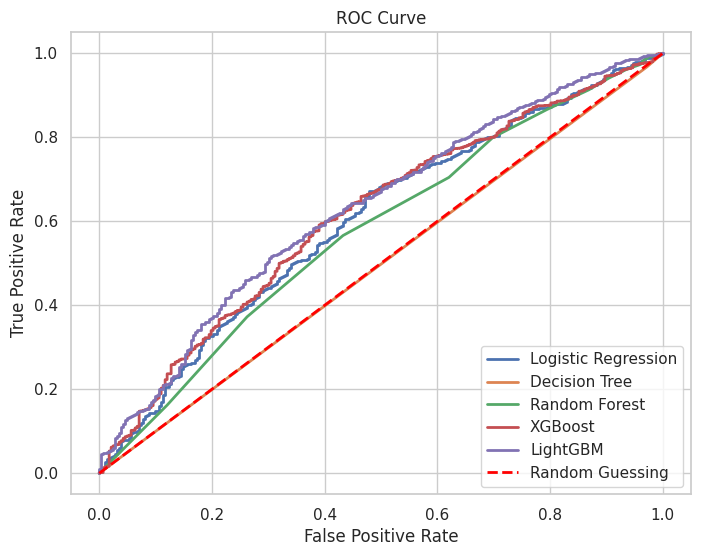

In [83]:
roc_auc_chart(roc_auc_results)

From the roc_auc curve above XGBoost is a higher curve than the rest and therefore is a better model than the others.

Confusion Matrix Tables:
Note: 1 stands for Positive and 0 for Negative in the diagram(s)


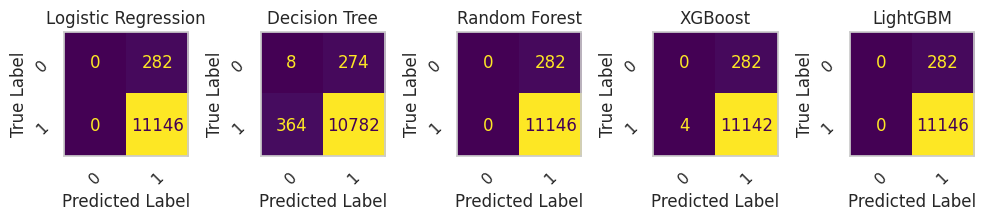

In [84]:
# Confusion Matrix
plot_confusion_matrix(dataframe_results=ml_results_with_emp_length)

## Model Optimisation

### Fine-Tuning

In [85]:
X_train, _, y_train, _ = train_test_data(
    stratify=y, dataframe=feature_engineering_df
)

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees in the ensemble
    "max_depth": [3, 4, 5],  # Maximum tree depth
}

# Define the scoring metrics
scoring = {
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1_score": make_scorer(f1_score),
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(objective="binary:logistic", seed=42)

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model, param_grid=param_grid, cv=5, scoring=scoring, refit="f1_score"
)
grid_search.fit(X_train, y_train)

# Get best model and score
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best parameters:", grid_search.best_params_)
print("Best score:", best_score)

Best parameters: {'max_depth': 3, 'n_estimators': 100}
Best score: 0.9874306957667794


In [86]:
# Applying the best params to the model

ml_models = {
    "XGBoost": xgb.XGBClassifier(
        max_depth=best_model.max_depth,
        n_estimators=best_model.n_estimators,
        random_state=42
    )
}

ml_results, roc_auc_results = get_ml_results(
    dataframe=feature_engineering_df, models=ml_models, stratify=y
)
ml_results

Training Models: 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

Performance Metrics:


Model Accuracy        Confusion Matrix F1 Score Precision ROC-AUC Score  \
0  XGBoost   0.9752  [[0, 282], [1, 11145]]   0.9875    0.9753        0.6223   

   Recall  
0  0.9999

## Summary

From the results so far, LightGBM gives the best results. LightGBM gave a precision score of 97.53% with ROC_AUC Score of 0.6315 and XGBoost gave a precision score of 97.53% with ROC_AUC Score of 0.6137. To improve the results further, external factors could be considered such as marriage, gender and education. Other techniques can be used to balance the data such as SMOTE-NC, although it would take longer to train. With fine-tuning of XGBoost, score improved to 0.6223. Further fine tuning of lightGBM could be done too.
<br><br>
Businesses that want to maximize their profitability and minimize risk of loan default will benefit from LightGBM model over the other ones. A conservative approach prioritizes on minimizing default risk through stricter lending standards (higher credit score requirements, lower debt-to-income ratios), therefore resulting fewer loans approved. Hence, fewer defaults. In contrast, an aggresive approach favors higher recall (fewer false negatives). This means that institutions can make loans accessible to those identified as a good borrower even with a higher risk of default.
<br><br>
Institutions should focus on precision if they are to follow a conservative approach, otherwise they should focus on recall for an aggresive approach. Since the precision score for defaulters is 2.47% (100% - 97.53%), it signifies that LightGBM model will increase company profit margins by 0.03% (2.5% (current default rate) - 2.47%). However, this model might perhaps not be reliable due to low roc_auc scores.